## FAKE NEWS DETECTOR

In [86]:
## import dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import seaborn as sns

In [78]:
## importing the training dataset

df = pd.read_csv("train_news.csv")

In [79]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [80]:
# dropping the unnammed column and the id column:
df = df.iloc[:,2:]

In [81]:
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20795,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [82]:
## total number of records in the dataset
df.shape

(20800, 4)

* We have records 200 short of 21K

In [83]:
## get the datatype of the features
df.dtypes

headline      object
written_by    object
news          object
label          int64
dtype: object

* All the features are object datatypes. All of the those are text features.

In [84]:
# let's check for the missing values in the dataset
df.isna().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

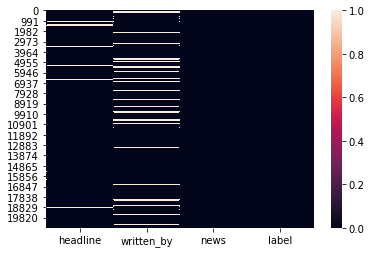

In [88]:
sns.heatmap(df.isna())

* There are missing values present in the dataset.

In [9]:
df.iloc[46,:]

headline                        مذكرة مفاهيمية عن رئاسة الروسية
written_by                                      voltairenet.org
news          اجتماع لمجلس الأمن من 28 أكتوبر 2016\nمذكرة مف...
label                                                         1
Name: 46, dtype: object

* There are non -englist words in the nes also , we need to remove tham as well

In [10]:
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20795,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [11]:
# first lets treat the missing values in the datasets

df.headline.fillna('notavailable',inplace=True)
df.written_by.fillna('unknown',inplace=True)
df.news.fillna('text',inplace=True)

In [12]:
df.isna().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

In [101]:
df[df.label == 0]['headline']

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
6        Rapid Evolution Saved This Fish From Pollution...
                               ...                        
20790    A Suburban Experiment Aims for Free Energy - T...
20793    Assad’s History of Chemical Attacks, and Other...
20794    One Police Shift: Patrolling an Anxious Americ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: headline, Length: 10387, dtype: object

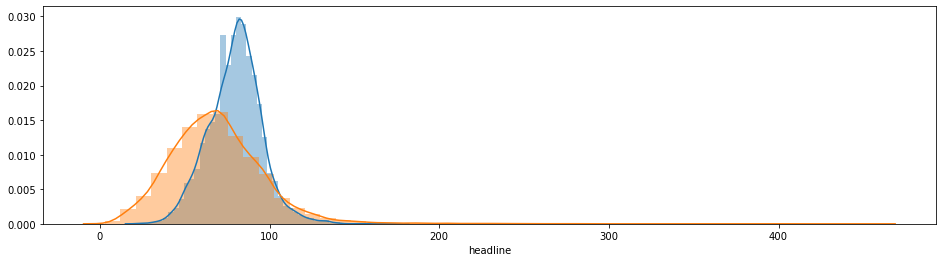

In [103]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0]['headline'].str.len())
sns.distplot(df[df.label == 1]['headline'].str.len())

* Most of the headlines have between 50 to 120 words.
* Fake news are less word count in the title relative to genuine news records.

## Data Processing

In [13]:
df.sample(5)

,headline,written_by,news,label
7640,"College Student Collects Unused Hotel Soap, Sa...",Amanda Froelich,Proper hygiene can go a long way in helping to...,1
4663,North Carolina Hillary Supporter Brags on Face...,unknown,Email \n\nHillary supporter Robert Dougherty f...,1
13053,US charges 61 with India-based scam involving ...,admin,US charges 61 with India-based scam involving ...,1
17396,"Stuck in Traffic, Polluting the Inside of Our ...",Tatiana Schlossberg,The average American commuter spent 50 hours i...,0
15046,M.T.A. Shortens L Train Shutdown to 15 Months ...,Emma G. Fitzsimmons,The Metropolitan Transportation Authority had ...,0


* let's combine headline and the written by features since written_by alone would not provide much vlues sinces it's mostly names of the authors. 

In [14]:
df['head_auth'] = df.headline + ' ' + df.written_by

In [15]:
df

,headline,written_by,news,label,head_auth
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham
...,...,...,...,...,...
20795,notavailable,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1,notavailable NeverSurrender
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,Albert Pike and the European Migrant Crisis Ri...
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,Dakota Access Caught Infiltrating Protests to ...
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,How to Stretch the Summer Solstice - The New Y...


In [16]:
import re

In [17]:
url = re.compile(r'https?://\S+|www\.\S+')

In [18]:
# function to remove url from the feautre if any
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [19]:
# function to remove any html code from the feature if any
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [20]:
# remove extra spaces if 2 or more consecutive spaces are present


In [21]:
df.head_auth= df.head_auth.apply(lambda x: remove_URL(x))
df.head_auth = df.head_auth.apply(lambda x: remove_html(x))

In [22]:
df.news = df.news.apply(lambda x: remove_URL(x))
df.news = df.news.apply(lambda x: remove_html(x))

In [99]:
# nlp_processor

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [31]:
# Training data



def nlp_preprocessor(X,col):
    corpus_train=[]
    ps = PorterStemmer()
    for i in range(len(X)):
        input = re.sub('[^a-zA-Z]',' ',X[col][i]) # except a-z and A-Z, substitute all other characters with ' '
        input = input.lower() # Lower case 
        input  = input.split() # tokenize the text
        input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
        text = ' '.join(input)  # concatenating all words into a single text (list is created)#
        corpus_train.append(text) # appending text into a single corpus #
    print("The length of the corpus train is: ", len(corpus_train))
    return corpus_train

In [25]:
data = nlp_preprocessor(df,'news')

The length of the corpus train is:  20800


In [39]:
cleaned_news = data.copy()

In [32]:
cleaned_head_auth = nlp_preprocessor(df,'head_auth')

The length of the corpus train is:  20800


In [33]:
cleaned_head_auth

['ethic question dog agricultur nomine georgia governor new york time eric lipton steve eder',
 'u must dig deep stop argentina lionel messi new york time david waldstein',
 'cotton hous walk plank vote bill cannot pass senat breitbart pam key',
 'paul lepag besieg main governor send conflict signal intent new york time jess bidgood',
 'digit trump win finian cunningham',
 'whatev outcom novemb th us collis cours china federico pieraccini unknown',
 'rapid evolut save fish pollut studi say new york time joanna klein',
 'alabama prison offici retali prison strike leader cut water cell brian sonenstein',
 'notavail steventexa',
 'live constant state love gillian',
 'hillari closet drunk new wikileak email reveal aid ask sober day v saxena',
 'bloomberg back pennsylvania attorney gener sentenc month prison iron sheik',
 'video le pen pelt egg keep smile liam deacon',
 'donald trump candid american special interest luke stranahan',
 'notavail hubwolf',
 'wharton busi school backer seek dis

In [50]:
cleaned_df = pd.DataFrame(list(zip(cleaned_news,cleaned_head_auth,df.label)),columns=['cleaned_news','cleaned_head_auth','label'])

In [51]:
cleaned_df

,cleaned_news,cleaned_head_auth,label
0,washington sonni perdu tell georgian grow wear...,ethic question dog agricultur nomine georgia g...,0
1,houston venezuela plan tactic approach design ...,u must dig deep stop argentina lionel messi ne...,0
2,sunday abc week discuss republican plan repeal...,cotton hous walk plank vote bill cannot pass s...,0
3,augusta beleagu republican governor main seem ...,paul lepag besieg main governor send conflict ...,0
4,finian cunningham written extens intern affair...,digit trump win finian cunningham,1
...,...,...,...
20795,dog lick vomit chines overlord,notavail neversurrend,1
20796,rixon stewart novemb rixon stewart nov migrant...,albert pike european migrant crisi rixon stewart,1
20797,post eddi know dakota access pipelin protest w...,dakota access caught infiltr protest incit vio...,1
20798,offici summer societi boutiqu societi memori s...,stretch summer solstic new york time alison cohn,0


## WordCloud

In [69]:
from wordcloud import WordCloud
from PIL import Image
import requests

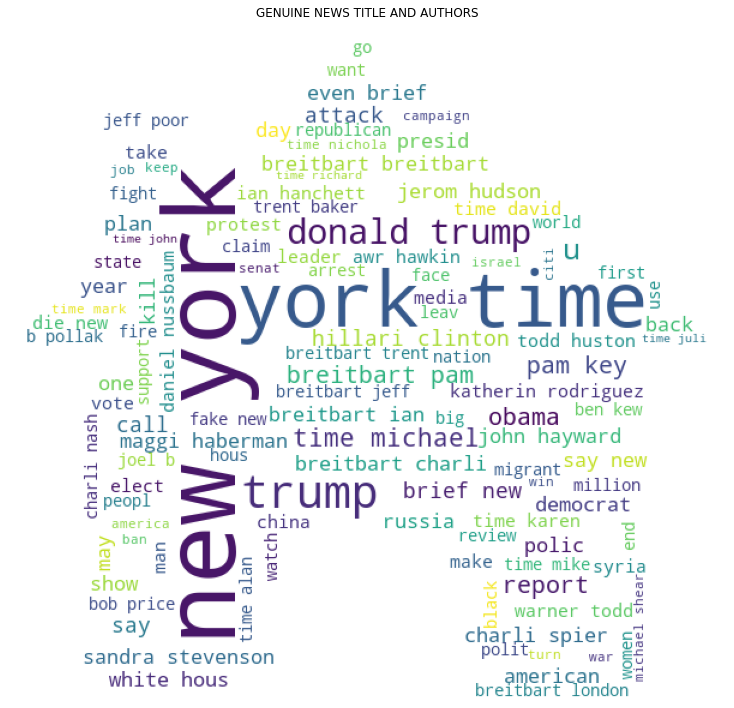

In [71]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 0]['cleaned_head_auth']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('GENUINE NEWS TITLE AND AUTHORS')
plt.show()

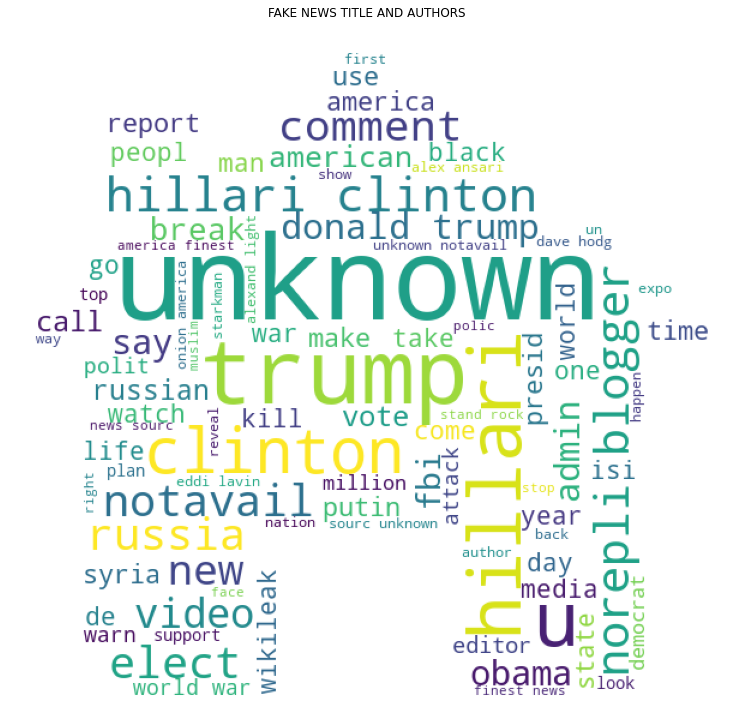

In [72]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_head_auth']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('FAKE NEWS TITLE AND AUTHORS')
plt.show()

* Check the authours of the fake news are very suspicius and not be speicified a proper name.

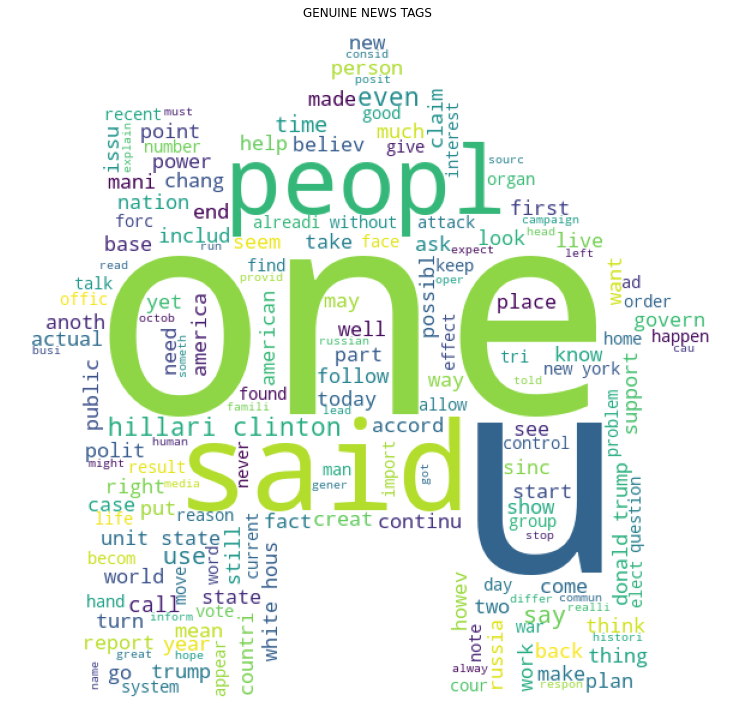

In [73]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_news']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('GENUINE NEWS TAGS')
plt.show()

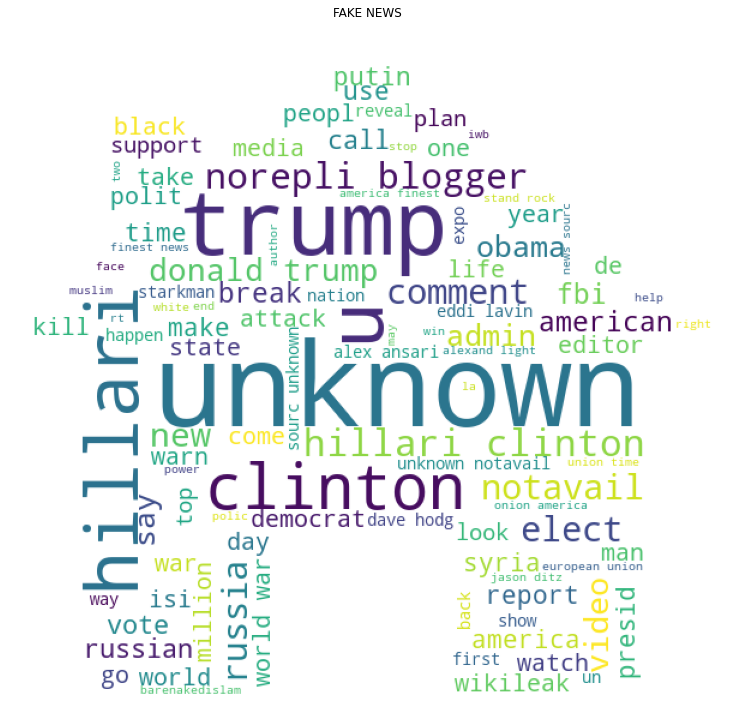

In [74]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_head_auth']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('FAKE NEWS')
plt.show()

* We can note the most of the fake news are crcle arounf trump, cliton, russia and politics.

## Saving the cleaned data

In [54]:
#saving the cleaned data
cleaned_df.to_csv('cleaned_data.csv',index=False,columns=cleaned_df.columns)

In [4]:
cleaned_df  = pd.read_csv("cleaned_data.csv")

In [5]:
cleaned_df.dropna(inplace=True)

## Train and Test split

In [6]:
training_data = cleaned_df.iloc[:17000,:]
testing_data = cleaned_df.iloc[17000:,:2]

In [46]:
testing_data_ground_truth = cleaned_df.iloc[17000:,-1]

In [7]:
training_data.shape

(17000, 3)

In [8]:
testing_data.shape

(3658, 2)

In [9]:
training_data.head()

,cleaned_news,cleaned_head_auth,label
0,washington sonni perdu tell georgian grow wear...,ethic question dog agricultur nomine georgia g...,0
1,houston venezuela plan tactic approach design ...,u must dig deep stop argentina lionel messi ne...,0
2,sunday abc week discuss republican plan repeal...,cotton hous walk plank vote bill cannot pass s...,0
3,augusta beleagu republican governor main seem ...,paul lepag besieg main governor send conflict ...,0
4,finian cunningham written extens intern affair...,digit trump win finian cunningham,1


In [10]:
testing_data.head()

,cleaned_news,cleaned_head_auth
17117,witwatersrand basin south africa mile unus min...,vision life mar earth depth new york time kenn...
17118,year scientist other concern climat chang talk...,iceland carbon dioxid storag project lock away...
17119,new email releas part wikileak podesta dump fe...,hillari clinton staffer black voter stupid eur...
17120,earn million fight floyd mayweath boxer politi...,world champion boxer manni pacquiao build home...
17121,comment american captiv last night world seri ...,watch world seri big news broke michael krieger


## Feature Target Split

In [11]:
X = training_data.iloc[:,:-1]
y = training_data.iloc[:,-1]

In [12]:
X.shape,y.shape

((17000, 2), (17000,))

## Training and validation split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((11900, 2), (11900,), (5100, 2), (5100,))

## Tokenization/Vectorization

In [16]:
X_train

,cleaned_news,cleaned_head_auth
9230,leader broken democrat parti new messag tri st...,broken democrat parti new messag donald trump ...
16643,zika viru harmless caus birth defect told moon...,zika viru harmless caus birth defect told unknown
4853,got love bed good bed actress patti lupon said...,patti lupon christin ebersol broadway friendli...
6866,home badg abus shot fire arrest made militar p...,shot fire arrest made militar polic remov pipe...
7769,comment realli happen michel obama campaign hi...,hell frozen michel obama made hillari destroy ...
...,...,...
11359,novemb pm day ago berni sander respond trump e...,berni sander rise senat prepar becom trump wor...
12047,rapper unload black celebr met donald trump el...,rapper trump poster child white supremaci jero...
5427,view novemb gold kwn king world news investor ...,alert former soro associ warn go send world to...
867,gold medal olympian turn realiti tv star caitl...,report tran jenner attend donald trump inaugur...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [19]:
cv2 =  CountVectorizer(max_features=5000,ngram_range=(1,3))

In [20]:
X_train_vect = cv.fit_transform(X_train.cleaned_news).toarray()

In [21]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
X_val_vect = cv.transform(X_val.cleaned_news).toarray()

In [43]:
X_val_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X_train_vect.shape,X_val_vect.shape

((11900, 5000), (5100, 5000))

## Model building

* Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [58]:
from sklearn.metrics import log_loss,recall_score,precision_score,f1_score,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [56]:
def train_n_pred_model(model_name):
    model_name.fit(X_train_vect,y_train)
    y_preds = model_name.predict(X_val_vect)
    print("Log loss -->" , log_loss(y_val,y_preds))
    print("Recall -->" , recall_score(y_val,y_preds))
    print("Precision -->" , precision_score(y_val,y_preds))
    print("F1 Score --> ",f1_score(y_val,y_preds))
    print("Classification Report --> \n", classification_report(y_val,y_preds))

In [143]:
train_n_pred_model(LogisticRegression(max_iter=1000))

Log loss --> 1.7337316675216656
Recall --> 0.9509419152276295
Precision --> 0.9487079091620987
F1 Score -->  0.9498235985887886
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2552
           1       0.95      0.95      0.95      2548

    accuracy                           0.95      5100
   macro avg       0.95      0.95      0.95      5100
weighted avg       0.95      0.95      0.95      5100



* Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
train_n_pred_model(DecisionTreeClassifier())

Log loss --> 3.7654443081779085
Recall --> 0.8830455259026687
Precision --> 0.8971291866028708
F1 Score -->  0.8900316455696202
Classification Report --> 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      2552
           1       0.90      0.88      0.89      2548

    accuracy                           0.89      5100
   macro avg       0.89      0.89      0.89      5100
weighted avg       0.89      0.89      0.89      5100



* Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
train_n_pred_model(RandomForestClassifier())

Log loss --> 2.045259453823664
Recall --> 0.9368131868131868
Precision --> 0.9442246835443038
F1 Score -->  0.9405043341213554
Classification Report --> 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2552
           1       0.94      0.94      0.94      2548

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



* Gradient Boost

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
train_n_pred_model(AdaBoostClassifier())

Log loss --> 2.153625649621106
Recall --> 0.9536891679748822
Precision --> 0.9239543726235742
F1 Score -->  0.9385863267670915
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2552
           1       0.92      0.95      0.94      2548

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



In [55]:
from sklearn.naive_bayes import GaussianNB

In [57]:
train_n_pred_model(GaussianNB())

Log loss --> 5.356989938910343
Recall --> 0.923469387755102
Precision --> 0.7978975924042048
F1 Score -->  0.8561033290885938
Classification Report --> 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      2552
           1       0.80      0.92      0.86      2548

    accuracy                           0.84      5100
   macro avg       0.85      0.84      0.84      5100
weighted avg       0.85      0.84      0.84      5100



* Logistic Regression is giving us the best results, let's do hyper parameter tuning on Logistic Regression

## Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [64]:
model = LogisticRegression(max_iter=1000)
solvers = ['lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cross_val,n_jobs=-1, scoring='f1',error_score=0,verbose=3)

In [ ]:
grid_search.fit(X_train_vect, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


* Tuning the logisitic regression gives us almost similar results.

## Final Model Testing on the Test Dataset

In [25]:
testing_data

,cleaned_news,cleaned_head_auth
17117,witwatersrand basin south africa mile unus min...,vision life mar earth depth new york time kenn...
17118,year scientist other concern climat chang talk...,iceland carbon dioxid storag project lock away...
17119,new email releas part wikileak podesta dump fe...,hillari clinton staffer black voter stupid eur...
17120,earn million fight floyd mayweath boxer politi...,world champion boxer manni pacquiao build home...
17121,comment american captiv last night world seri ...,watch world seri big news broke michael krieger
...,...,...
20795,dog lick vomit chines overlord,notavail neversurrend
20796,rixon stewart novemb rixon stewart nov migrant...,albert pike european migrant crisi rixon stewart
20797,post eddi know dakota access pipelin protest w...,dakota access caught infiltr protest incit vio...
20798,offici summer societi boutiqu societi memori s...,stretch summer solstic new york time alison cohn


In [29]:
test_vect = cv.transform(testing_data.cleaned_news).toarray()

In [30]:
test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(max_iter=1000)

In [38]:
model.fit(X_train_vect,y_train)

LogisticRegression(max_iter=1000)

In [40]:
test_prediction = model.predict(test_vect)

* Final Model Evaluation ---->

### `Log Loss`

In [47]:
log_loss(testing_data_ground_truth,test_prediction)

1.9356311415715894

### `Recall`

In [49]:
recall_score(testing_data_ground_truth,test_prediction)

0.9499192245557351

### `Precision`

In [51]:
precision_score(testing_data_ground_truth,test_prediction)

0.9402985074626866

### `F1-Score`

In [52]:
f1_score(testing_data_ground_truth,test_prediction)

0.9450843825341549

### `ROC_AUC Score`

In [63]:
roc_auc_score(testing_data_ground_truth,test_prediction)

0.9438657755205105

### `Classification Report`

In [54]:
print(classification_report(testing_data_ground_truth,test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1801
           1       0.94      0.95      0.95      1857

    accuracy                           0.94      3658
   macro avg       0.94      0.94      0.94      3658
weighted avg       0.94      0.94      0.94      3658



### `Confusion Matrix`

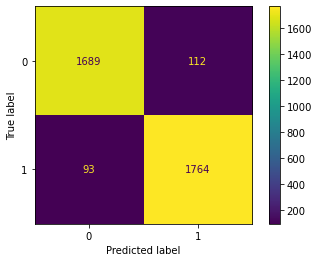

In [59]:
plot_confusion_matrix(model,test_vect,testing_data_ground_truth)

### `Sensitivity and Specificity Curve`

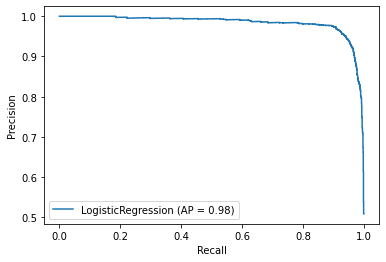

In [60]:
plot_precision_recall_curve(model,test_vect,testing_data_ground_truth)

### `ROC CURVE`

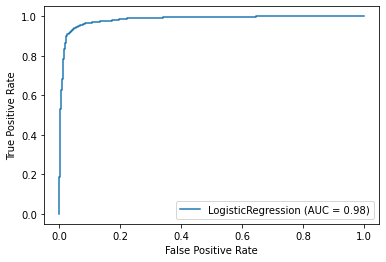

In [61]:
plot_roc_curve(model,test_vect,testing_data_ground_truth)

## Saving the final model

In [1]:
import joblib

In [4]:
joblib.dump(model,'fake_news_detector_model.pkl')

['fake_news_detector_model.pkl']

# `THANK YOU!!!`